#Datos Generales (Analisis)

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Machine_Learning_Classic/Databasets/mercadeo_bancario.csv")
df.head(5)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,0,cellular,jun,thu,339,27,2,1993,1
3,39,services,married,Technological_school,1,no,no,no,0,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,retired,married,preschool,2,no,yes,no,249888,0,4,cellular,aug,fri,137,2,1,1184,1


In [141]:
df.shape #(Filas, columnas)

(41188, 19)

In [142]:
df.isnull().sum() #Analizando datos nulos

edad                        0
trabajo                     0
estado_civil                0
educacion                   0
total_hijos                 0
credito_sin_pago            0
prestamo_vivienda           0
prestamo_personal           0
valor_prestamo              0
dias_ultimo_pago            0
tarjetas_credito            0
contacto                    0
mes                         0
dia_semana                  0
duracion_ultimo_contacto    0
dias_ultimo_contacto        0
anterior_contacto           0
numero_empleados            0
si_no                       0
dtype: int64

##Proceso

In [143]:
#Buscando Valores String para luego
print(sorted(df["trabajo"].unique()))
print(sorted(df["estado_civil "].unique()))
print(sorted(df["educacion"].unique()))
print(sorted(df["credito_sin_pago"].unique()))
print(sorted(df["prestamo_vivienda"].unique()))
print(sorted(df["prestamo_personal"].unique()))
print(sorted(df["contacto"].unique()))
print(sorted(df['mes'].unique()))
print(sorted(df['dia_semana'].unique()))

['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']
['divorced', 'married', 'single', 'unknown']
['Technological_school', 'illiterate', 'preschool', 'primary_school', 'professional.course', 'tecnical_school', 'university.degree', 'unknown']
['no', 'unknown', 'yes']
['no', 'unknown', 'yes']
['no', 'unknown', 'yes']
['cellular', 'telephone']
['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']
['fri', 'mon', 'thu', 'tue', 'wed']


In [144]:
#Remplazando los datos no numericos a numericos
valoresTrabajo= {"trabajo":{"admin.":1, "blue-collar":2, "entrepreneur":3, "housemaid":4, "management":5, "retired":6, "self-employed":7, "services":8, "student":9, "technician":10, "unemployed":11, "unknown":12}}
ValoresEstadoCivil= {"estado_civil ":{"unknown":1, "single":2, "married":3, "divorced":4}}
valoresEducacion= {"educacion":{"unknown":1, "illiterate":2, "preschool":3, "primary_school":4, "tecnical_school":5, "Technological_school":6, "university.degree":7, "professional.course":8}}
valoresCreditoSinPago= {"credito_sin_pago":{"unknown":1, "yes":2, "no":3}}
valoresPrestamoVivienda= {"prestamo_vivienda":{"unknown":1, "yes":2, "no":3}}
valoresPrestamoPersonal= {"prestamo_personal":{"unknown":1, "yes":2, "no":3}}
valoresContacto= {"contacto":{"cellular":1, "telephone":2}}
valoresMeses= {"mes":{"mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12}}
valoresDia={"dia_semana":{"mon":1, "tue":2, "wed":3, "thu":4, "fri":5}}

In [145]:
#Remplazando en el Dataframe
df.replace(valoresTrabajo, inplace=True)
df.replace(ValoresEstadoCivil, inplace=True)
df.replace(valoresEducacion, inplace=True)
df.replace(valoresCreditoSinPago, inplace=True)
df.replace(valoresPrestamoVivienda, inplace=True)
df.replace(valoresPrestamoPersonal, inplace=True)
df.replace(valoresContacto, inplace=True)
df.replace(valoresMeses, inplace=True)
df.replace(valoresDia, inplace=True)

df.head(20)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,2,3,3,7,1,2,3,268017,0,5,1,8,4,210,43,0,88,0
1,53,10,3,1,1,3,3,3,0,0,0,1,11,5,138,0,0,14,0
2,28,5,2,7,3,3,2,3,308036,0,0,1,6,4,339,27,2,1993,1
3,39,8,3,6,1,3,3,3,0,0,4,1,4,5,185,0,0,1338,0
4,55,6,3,3,2,3,2,3,249888,0,4,1,8,5,137,2,1,1184,1
5,30,5,4,3,6,2,2,3,499476,75,1,1,7,2,68,90,0,1553,0
6,37,2,3,3,6,3,2,3,86520,0,5,1,5,4,204,66,0,442,0
7,39,2,4,5,4,3,2,3,176081,0,1,1,5,5,191,51,0,495,0
8,36,1,3,7,6,3,3,3,0,0,3,1,6,1,174,0,1,1097,1
9,27,2,2,3,3,3,2,3,323709,0,1,1,4,4,191,33,1,414,0


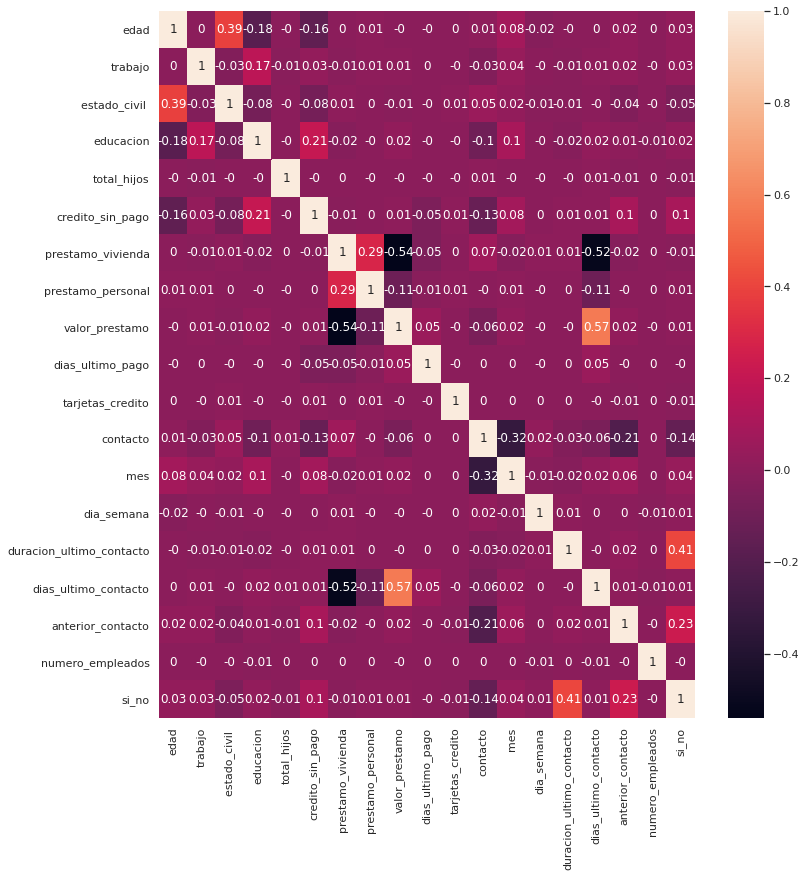

In [146]:
#función de correlación de pandas (cercano a 1 es la mejor correlación, negativos la peor)
sns.set(rc={'figure.figsize':(12,13)})
correlation_matrix = df.corr().round(2)
# annot = True (para imprimir los valores dentro del cuadrado)
sns.heatmap(data=correlation_matrix, annot=True)

##Entrenamiento

In [163]:
#Se daña si uso esto: x = df.dias_ultimo_contacto, df.valor_prestamo, df.duracion_ultimo_contacto, df.edad, df.prestamo_personal, df.prestamo_vivienda
x = df
y = df.si_no

In [164]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=3,test_size=0.7)

In [165]:
regresion = LogisticRegression()

In [167]:
regresion.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [172]:
y_prediccion = regresion.predict(X_test)

In [173]:
porcentaje = metrics.accuracy_score(y_test, y_prediccion)
print("Porcentaje= "+str(100 * porcentaje))

Porcentaje= 89.46309655937846
